In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import graphviz
from sklearn.tree import export_graphviz

In [2]:
df = pd.read_csv('Customer-Churn-Records.csv')
df.head(10)



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Unnamed: 18
0,0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


In [3]:
data = df.drop(['RowNumber', 'Surname', 'Geography', 'Gender', 'Card Type'], axis=1)
data.head()


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Unnamed: 18
0,1,Hargrave,Female,42,2,0.00,1,1,1,101348.88,1,1,DIAMOND,464
1,2,Hill,Female,41,1,83807.86,1,0,1,112542.58,0,1,DIAMOND,456
2,3,Onio,Female,42,8,159660.80,3,1,0,113931.57,1,1,DIAMOND,377
3,4,Boni,Female,39,1,0.00,2,0,0,93826.63,0,0,GOLD,350
4,5,Mitchell,Female,43,2,125510.82,1,1,1,79084.10,0,0,GOLD,425


In [4]:
data = df.drop(['RowNumber', 'Surname', 'Geography', 'Gender', 'Card Type'], axis=1)
data.head()


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Unnamed: 18
0,1,Hargrave,Female,42,2,0.00,1,1,1,101348.88,1,1,DIAMOND,464
1,2,Hill,Female,41,1,83807.86,1,0,1,112542.58,0,1,DIAMOND,456
2,3,Onio,Female,42,8,159660.80,3,1,0,113931.57,1,1,DIAMOND,377
3,4,Boni,Female,39,1,0.00,2,0,0,93826.63,0,0,GOLD,350
4,5,Mitchell,Female,43,2,125510.82,1,1,1,79084.10,0,0,GOLD,425


In [5]:
data.columns



Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Point Earned',
       'Unnamed: 18'],
      dtype='object')

In [6]:
print("Number of duplicates:", data.duplicated().sum())
print("Missing values per column:\n", data.isnull().sum())


Number of duplicates: 0
Missing values per column:
 CustomerId            0
CreditScore           0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Point Earned          0
Unnamed: 18           0
dtype: int64


In [7]:
print("Data shape:", data.shape)


Data shape: (10, 14)


In [8]:

threshold_balance = data["Balance"].mean()
threshold_active = data["IsActiveMember"].mean()
print("Threshold Balance:", threshold_balance)
print("Threshold IsActiveMember:", threshold_active)


Threshold Balance: 3.9
Threshold IsActiveMember: 0.7


In [9]:
def create_purchase_label(row):
    if row['IsActiveMember'] > threshold_active and row['Balance'] > threshold_balance:
        return 1
    else:
        return 0


In [10]:
data['PurchaseLabel'] = data.apply(create_purchase_label, axis=1)
print(data[['Balance', 'IsActiveMember', 'PurchaseLabel']])


   Balance  IsActiveMember  PurchaseLabel
0        2               1              0
1        1               0              0
2        8               1              1
3        1               0              0
4        2               1              0
5        8               1              1
6        7               1              1
7        4               1              1
8        4               0              0
9        2               1              0


In [11]:
print("Sum of PurchaseLabel:", data['PurchaseLabel'].sum())


Sum of PurchaseLabel: 4


In [12]:
y = data['PurchaseLabel']
x = data.drop(['PurchaseLabel'], axis=1)
print("Features head:\n", x.head())
print("Target head:\n", y.head())



Features head:
    CustomerId CreditScore     Age  Tenure  Balance  NumOfProducts  HasCrCard  \
0           1    Hargrave  Female      42        2           0.00          1   
1           2        Hill  Female      41        1       83807.86          1   
2           3        Onio  Female      42        8      159660.80          3   
3           4        Boni  Female      39        1           0.00          2   
4           5    Mitchell  Female      43        2      125510.82          1   

   IsActiveMember  EstimatedSalary     Exited  Complain  Satisfaction Score  \
0               1                1  101348.88         1                   1   
1               0                1  112542.58         0                   1   
2               1                0  113931.57         1                   1   
3               0                0   93826.63         0                   0   
4               1                1   79084.10         0                   0   

  Point Earned  Unnamed: 18 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)


In [14]:
X = x[['HasCrCard', 'IsActiveMember']]


In [15]:
encoder = OneHotEncoder(drop='first')
X_encoded = encoder.fit_transform(X)


In [16]:
x = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out(['HasCrCard', 'IsActiveMember']))


In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)


In [18]:

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [19]:

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



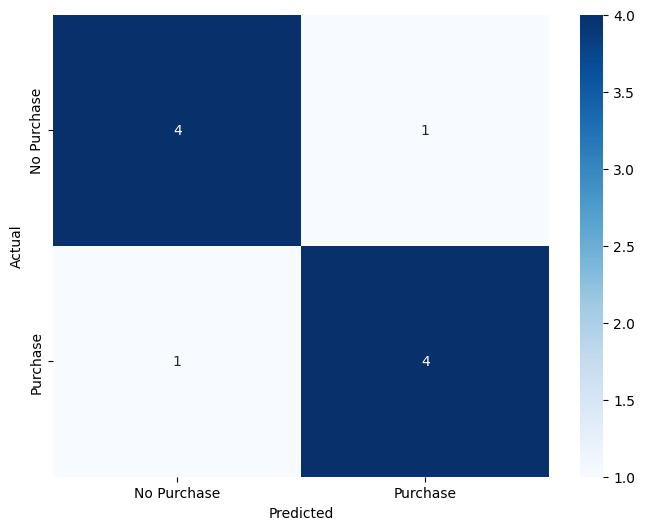

In [28]:
#Visulization 

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Sample data: true labels and predicted labels
y_true = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
y_pred = [0, 0, 0, 1, 0, 1, 1, 1, 0, 1]

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Purchase', 'Purchase'],
            yticklabels=['No Purchase', 'Purchase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
